# Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Generate Dataset and plot it

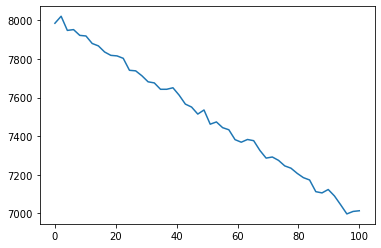

In [2]:
num_samples = 50
x_train = np.linspace(0, 100, num_samples)
a = -10
b = 8000
y_train = a * x_train + b + np.random.normal(loc=0, scale=20, size=num_samples)


plt.plot(x_train, y_train)

Estimate the best fit linear parameters of our model $y=a x + b + \epsilon$, where $\epsilon$ is some noise. Make use of a least squares fit results in, see (see [Simple linear regression](https://en.wikipedia.org/wiki/Simple_linear_regression):
* The covariance measures the linear dependency, but for obtaining a slope of dimensions [y]/[x] wee need to divide by the variance in x, because the covariance has units $[Cov(x,y)]=[x][y]$, dividing by the variance of x gives something in the right dimensions:  $\hat{a} = [Cov(x,y)]/[Var(x)]=[y]/[x]$.
* The estimated intercept $\hat{b}=\overline{y}-\hat{a} \overline{x}$

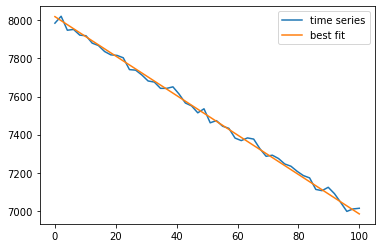

In [11]:
# note np.var(x_train) equals np.cov(x_train,y_train)[0,0]
hat_a = np.cov(x_train, y_train)[0, 1] / np.var(x_train)
# a simple, but less accurate guess could have been y_train[0]
hat_b = np.average(y_train) - hat_a * np.average(x_train)
new_x = np.linspace(0, 100)
plt.plot(x_train, y_train, label="time series")
plt.plot(new_x, hat_a * new_x + hat_b, label="best fit")
plt.legend()

In [8]:
print(f"estimated intersection {hat_b} (real {b}), estimated slope {hat_a} (real {a})")

estimated intersection 8019.38981879214 (real 8000), estimated slope -10.353074619239878 (real -10)


## Custom implementation of covariance matrix:

In [9]:
x = np.random.normal(size=20)
y = np.linspace(2, 4, 20)


def compute_covariance_matrix(x, y):
    stacked = np.stack((x, y), axis=1)  # results in (num_samples x 2) Matrix
    stacked -= np.mean(stacked, axis=0)
    ddof = 1  # since the means are estimated from the sample
    # alternative
    return np.dot(stacked.T, stacked) ** 1.0 / (stacked.shape[0] - ddof)
    # alternative
    # return np.sum(np.einsum("ij,ik->ijk",stacked, stacked), axis=0)*1.0/(stacked.shape[0]-ddof)


print("custom impl covariance matrix", compute_covariance_matrix(x, y))
print("numpy impl covariance matrix", np.cov(x, y))

custom impl covariance matrix [[0.7412867  0.26019991]
 [0.26019991 0.38781163]]
numpy impl covariance matrix [[0.7412867  0.26019991]
 [0.26019991 0.38781163]]
